# File and libraries

In [25]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_0_2024_agg_time_scaling_input.csv'


file_tag = "Google Merch Store 2024-2025"


# DSLabs functions

In [26]:
%run "scripts/dslabs_functions.py"


# Data functions

In [27]:
%run "scripts/data_functions.py"


data_functions loaded


# Load

In [28]:
# test_data=True
test_data=False


data=pd.read_csv(filepath, decimal=".",  index_col='Date', parse_dates=True,  infer_datetime_format=True)

 
target='Sessions'
series: Series = data[target]

test_split_threshold = 0.8

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 427 entries, 2024-01-04 to 2025-03-05
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sessions                         427 non-null    float64
 1   Seven-day active users           427 non-null    float64
 2   28-day active users              427 non-null    float64
 3   Events per session               427 non-null    float64
 4   Add to baskets                   427 non-null    float64
 5   Average purchase revenue         427 non-null    float64
 6   Purchase revenue                 427 non-null    float64
 7   Average session duration         427 non-null    float64
 8   ARPU                             427 non-null    float64
 9   ARPPU                            427 non-null    float64
 10  Views per user                   427 non-null    float64
 11  Total users                      427 non-null    float64
 12  Pro

# Differentiation - no diff

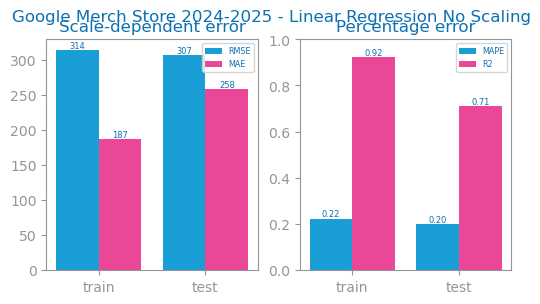

In [29]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


data_0 = data.copy()

# Split the data into train and test sets
train_0, test_0 = series_train_test_split(data_0, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_0 = train_0.drop(columns=[target])
trnY_0 = train_0[target]
tstX_0 = test_0.drop(columns=[target])
tstY_0 = test_0[target]

# Fit the linear regression model
model_0 = LinearRegression()
model_0.fit(trnX_0, trnY_0)

# Predict the training and testing data
prd_trn_0 = Series(model_0.predict(trnX_0), index=train_0.index)
prd_tst_0 = Series(model_0.predict(tstX_0), index=test_0.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_0[target], test_0[target], prd_trn_0, prd_tst_0, title=f"{file_tag} - Linear Regression No Scaling")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## no differentiating plot

<Axes: xlabel='Date', ylabel='Sessions'>

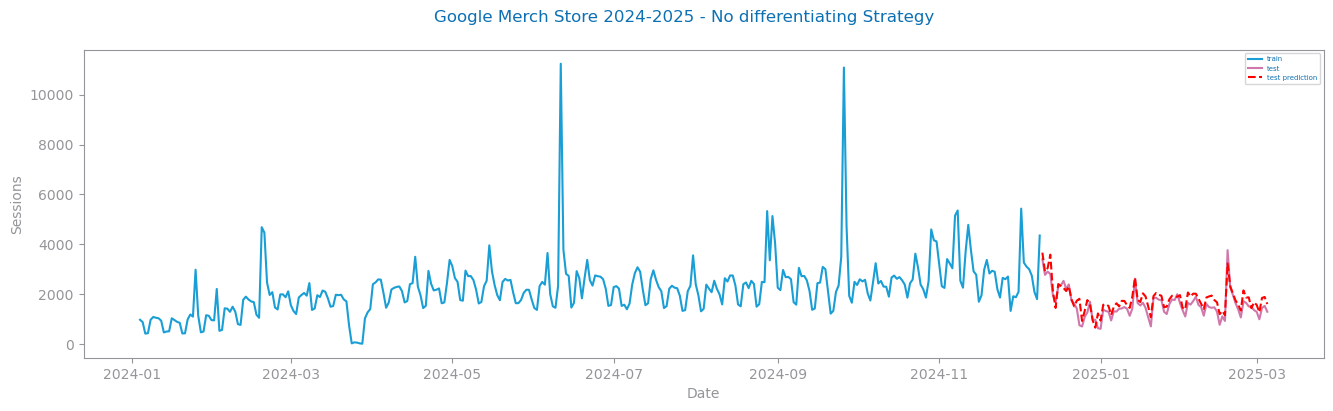

In [30]:
plot_forecasting_series(
    train_0[target],
    test_0[target],
    prd_tst_0,
    title=f"{file_tag} - No differentiating Strategy",
    xlabel='Date',
    ylabel=target,
)

# Differentiation1 - Standard Scaler

## Differentiation1 strategy Application

In [31]:

def apply_strategy_1(df):

    df_copy=df.copy()
    
    df_diff=df_copy.diff().dropna()

    return df_diff


data_1=apply_strategy_1(data)

series_1: Series = data_1[target]

data_1



,Sessions,Seven-day active users,28-day active users,Events per session,Add to baskets,Average purchase revenue,Purchase revenue,Average session duration,ARPU,ARPPU,...,Sessions other,Sessions referral,season,commercial_season,week_of_month,day_of_week_nr,is_weekend,is_holiday,is_major_event_day,is_commercial_event_day
Date,,,,,,,,,,,,,,,,,,,,,
2024-01-05,-95.0,653.0,653.0,0.152273,51.0,66.431489,2892.32,32.765647,4.587827,67.934467,...,0.0,-5.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
2024-01-06,-461.0,315.0,315.0,-3.872639,-293.0,-98.622632,-6461.16,-77.777111,-7.999626,-103.732703,...,0.0,-39.0,0.000000,-1.047198,0.0,1.0,1.0,0.0,0.0,0.0
2024-01-07,20.0,333.0,333.0,3.610865,45.0,-15.110833,180.47,-20.573499,0.434006,-25.873571,...,0.0,5.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
2024-01-08,535.0,668.0,668.0,-2.664253,109.0,14.756071,987.93,60.296003,-0.055361,30.023571,...,0.0,45.0,0.000000,0.000000,0.0,-6.0,-1.0,0.0,0.0,0.0
2024-01-09,112.0,765.0,765.0,2.299613,72.0,69.775815,4183.10,9.491240,4.553263,69.591892,...,0.0,-4.0,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-01,-71.0,-39.0,-42.0,-5.248611,-175.0,-34.389722,-3607.43,-127.643147,-3.466400,-46.491061,...,0.0,-113.0,1.570796,1.047198,-4.0,1.0,1.0,0.0,0.0,0.0
2025-03-02,-296.0,-54.0,-90.0,3.234105,18.0,-15.565909,644.80,100.455378,1.129309,-7.250000,...,0.0,-7.0,0.000000,0.000000,1.0,1.0,0.0,0.0,0.0,0.0
2025-03-03,449.0,-246.0,-256.0,4.114546,187.0,55.238788,2737.63,63.015459,2.046040,51.247813,...,0.0,149.0,0.000000,0.000000,0.0,-6.0,-1.0,0.0,0.0,0.0


## Differentiation evaluate

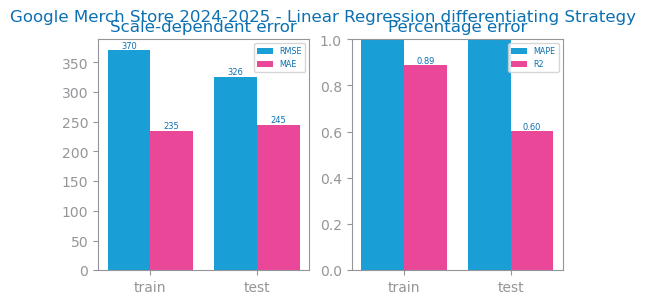

In [32]:
from pandas import Series
from dslabs_functions import plot_forecasting_eval
from sklearn.linear_model import LinearRegression


# Split the data into train and test sets
train_1, test_1 = series_train_test_split(data_1, trn_pct=test_split_threshold)

# Prepare the training and testing data
trnX_1 = train_1.drop(columns=[target])
trnY_1 = train_1[target]
tstX_1 = test_1.drop(columns=[target])
tstY_1 = test_1[target]

# Fit the linear regression model
model_1 = LinearRegression()
model_1.fit(trnX_1, trnY_1)

# Predict the training and testing data
prd_trn_1 = Series(model_1.predict(trnX_1), index=train_1.index)
prd_tst_1 = Series(model_1.predict(tstX_1), index=test_1.index)

# Plot the forecasting evaluation
plot_forecasting_eval(train_1[target], test_1[target], prd_trn_1, prd_tst_1, title=f"{file_tag} - Linear Regression differentiating Strategy")
savefig(f"images/{file_tag}_linear_regression_eval_no_scale.png")

## Differentiation1 Plot

<Axes: xlabel='Date', ylabel='Sessions'>

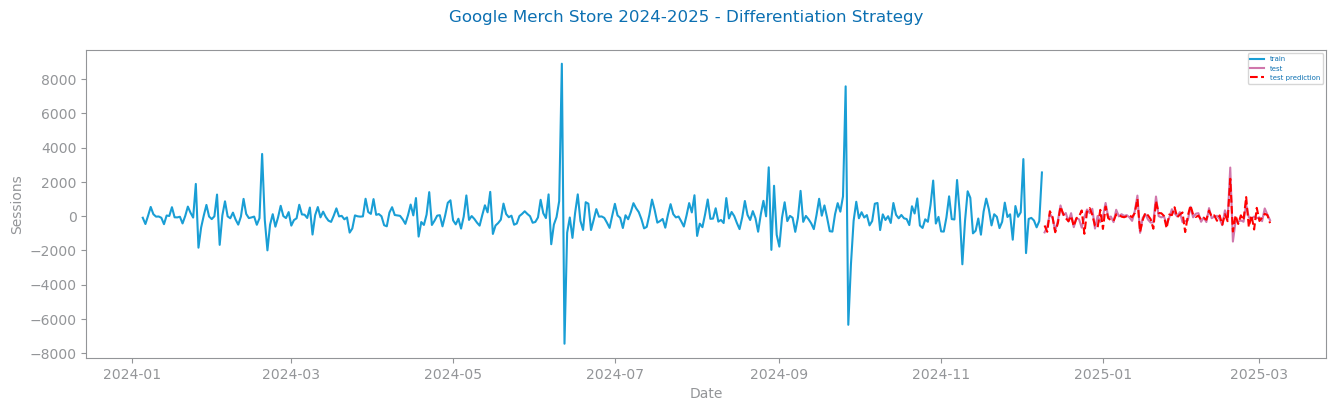

In [33]:
plot_forecasting_series(
    train_1[target],
    test_1[target],
    prd_tst_1,
    title=f"{file_tag} - Differentiation Strategy",
    xlabel='Date',
    ylabel=target,
)

# Approach uplift comparison

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate performance metrics for each model
metrics = {
    "Model": ["No Differentiation", "Differentiation"],
    "MAE": [
        mean_absolute_error(test_0[target], prd_tst_0),
        mean_absolute_error(test_1[target], prd_tst_1),
    ],
    "MSE": [
        mean_squared_error(test_0[target], prd_tst_0),
        mean_squared_error(test_1[target], prd_tst_1),
    ],
    "RMSE": [
        mean_squared_error(test_0[target], prd_tst_0, squared=False),
        mean_squared_error(test_1[target], prd_tst_1, squared=False),
    ],
    "R²": [
        r2_score(test_0[target], prd_tst_0),
        r2_score(test_1[target], prd_tst_1),
    ],
    "MAPE": [
        mean_absolute_percentage_error(test_0[target], prd_tst_0),
        mean_absolute_percentage_error(test_1[target], prd_tst_1),
    ]
}

# Create a DataFrame to display the metrics
performance_df = pd.DataFrame(metrics)
print(performance_df)

                Model         MAE            MSE        RMSE        R²  \
0  No Differentiation  258.235372   94123.895253  306.796179  0.709111   
1     Differentiation  245.099452  106356.650484  326.123674  0.603580   

        MAPE  
0  19.869564  
1        inf  


# save to csv

In [37]:
if test_data==False:
    

    data_save=data.copy()

    # apply winning strategy
    data_save=apply_strategy_1(data_save)

    data_save.reset_index(inplace=True)
    
        
    data_save.to_csv(f"data/df_merch_0_2024_agg_time_diff_input.csv", index=False)
    

    print(data_save.columns)

Index(['Date', 'Sessions', 'Seven-day active users', '28-day active users',
       'Events per session', 'Add to baskets', 'Average purchase revenue',
       'Purchase revenue', 'Average session duration', 'ARPU', 'ARPPU',
       'Views per user', 'Total users', 'Promotion clicks', 'Sessions Mobile',
       'Seven-day active users Mobile', '28-day active users Mobile',
       'New users Mobile', 'Scrolled users Mobile', 'Engaged sessions Mobile',
       'Views Mobile', 'Event count Mobile', 'Events per session Mobile',
       'Item-list view events Mobile', 'Item view events Mobile',
       'Add to baskets Mobile', 'Checkouts Mobile',
       'E-commerce purchases Mobile', 'Average purchase revenue Mobile',
       'Purchase revenue Mobile', 'First time purchasers Mobile',
       'Average session duration Mobile', 'Sessions (not set)',
       'Sessions affiliate', 'Sessions cpc', 'Sessions cpm', 'Sessions email',
       'Sessions other', 'Sessions referral', 'season', 'commercial_season'